<a href="https://colab.research.google.com/github/SeanPatrickHurley/MLE_S25/blob/main/HW2_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#First, we import libraries


In [4]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Now, we load our data

In [5]:
data = load_iris() #shift+tab

df = pd.DataFrame()
df['sepal length'] = data['data'][:,0]
df['sepal width'] = data['data'][:,1]
df['petal length'] = data['data'][:,2]
df['petal width'] = data['data'][:,3]

raw_data = data['data']

#raw_data.shape

petal_area_mod = (raw_data[:, 2] * raw_data[:, 3])
sepal_length = raw_data[:, 0]
sepal_width = raw_data[:, 1]

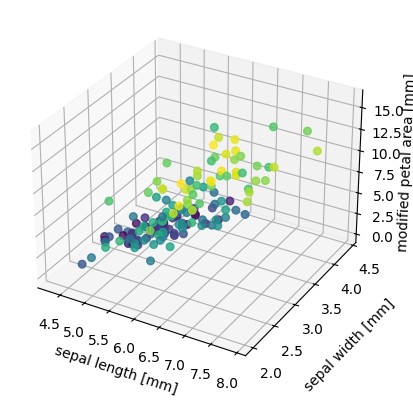

In [6]:
x = sepal_length
y = sepal_width
z = petal_area_mod

colors = np.linspace(0, 10, len(x))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(x, y, z, c=colors, s=30, cmap='viridis', alpha=0.8)

# Add labels
ax.set_xlabel('sepal length [mm]')
ax.set_ylabel('sepal width [mm]', labelpad=10)
ax.set_zlabel('modified petal area [mm]', labelpad=0.5)

# Add colorbar
#cbar = fig.colorbar(scatter, ax=ax)
#cbar.set_label('Color Scale')

plt.show()

# Now, we seperate and train our data

In [29]:
from sklearn.model_selection import train_test_split

df['target'] = data['target']

X = np.column_stack((x,y,z))
Y = df['target'].to_numpy()

X_train, X_test, y_train, y_test, idx_train, idx_test=train_test_split(
    X,Y, range(X.shape[0]),
    test_size=0.30,
    train_size=0.70,
    random_state=123,
    shuffle=True,
    stratify=Y)

#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)
#print(len(idx_train))
#print(len(idx_test))

class KMeans:
    def __init__(self, k):
        self.k = k
        self.cluster_labels = None
    def fit(self, X):
        self.centroids = X[np.random.choice(X.shape[0], self.k, replace=False), :]
        self.cluster_labels = np.arange(self.k)
        while True:
            distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in self.centroids])
            self.clusters = np.argmin(distances, axis=0)
            new_centroids = np.array([X[self.clusters == i, :].mean(axis=0) for i in range(self.k)])
            # check convergence
            if np.array_equal(new_centroids, self.centroids):
                break
            else:
                self.centroids = new_centroids

    def predict(self, X):
        distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in self.centroids])
        return self.cluster_labels[np.argmin(distances, axis=0)]

model = KMeans(k=3)
model.fit(X_train)
kmeans_labels = model.predict(X_test)
cluster_coords = model.centroids
print('predicted_labels:', kmeans_labels)
print('cluster centroids:', cluster_coords)

y_train
df['kmeans_labels'] = model.predict(X)

print(f'X_test shape = {X_test.shape}')
print(f'X shape = {X.shape}')
print(f'kmeans_labels shape = {len(kmeans_labels)}')

predicted_labels: [2 0 2 2 0 1 1 2 1 1 0 1 0 1 2 1 0 0 1 1 1 1 1 2 1 2 0 1 2 0 0 0 0 2 2 2 0
 0 0 1 0 2 2 0 2]
cluster centroids: [[ 6.584375    2.9875     11.381875  ]
 [ 5.04285714  3.43428571  0.40257143]
 [ 5.88947368  2.72368421  5.69578947]]
X_test shape = (45, 3)
X shape = (150, 3)
kmeans_labels shape = 45


# Now we compute our plot

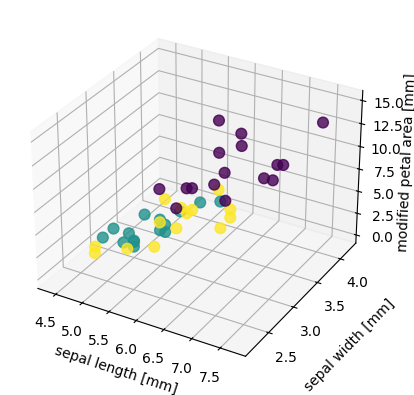

In [42]:
# prompt: Take the above code, and create a 3D matplotlib using kmeans_labels to label the X_test data, the first index being x, the second index being y, and the third index being z.

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming X_test, kmeans_labels are defined from the previous code

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = X_test[:, 0]
y = X_test[:, 1]
z = X_test[:, 2]

scatter = ax.scatter(x, y, z, c=kmeans_labels, s=60, cmap='viridis', alpha=0.8)

ax.set_xlabel('sepal length [mm]')
ax.set_ylabel('sepal width [mm]', labelpad=10)
ax.set_zlabel('modified petal area [mm]', labelpad=0.5)

plt.show()

Now we will show the plot given the actual species of the flowers

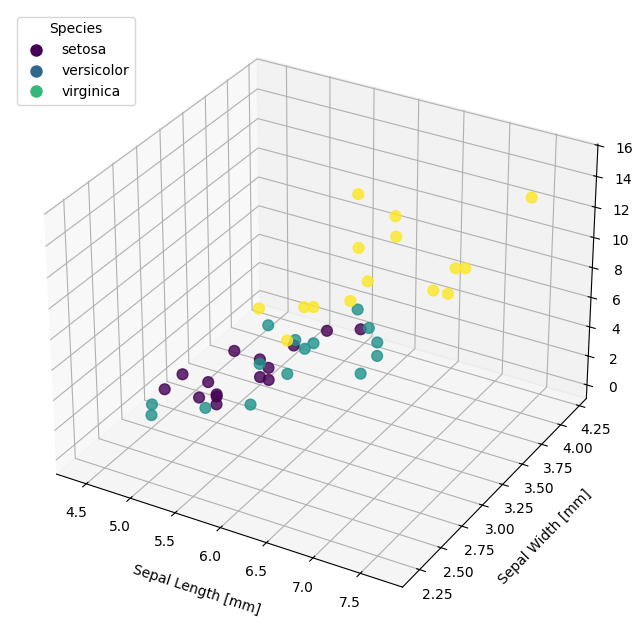

In [51]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

# Assuming data is already defined (e.g., Iris dataset)
df = pd.DataFrame()
df['target'] = data['target']

# Map numerical target values to species names
named_targets = [data.target_names[elm] for elm in df['target']]
df['species_name'] = named_targets

# Assuming X_test and idx_test are defined from previous code
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x = X_test[:, 0]
y = X_test[:, 1]
z = X_test[:, 2]

# Create a dictionary mapping species names to numerical values
species_mapping = {species: i for i, species in enumerate(np.unique(df['species_name']))}

# Convert the species names to numerical values for coloring
colors = [species_mapping[species] for species in df['species_name'][idx_test]]

# Scatter plot with colors based on species
scatter = ax.scatter(x, y, z, c=colors, s=60, cmap='viridis', alpha=0.8)

# Add labels
ax.set_xlabel('Sepal Length [mm]', labelpad=10)
ax.set_ylabel('Sepal Width [mm]', labelpad=10)
ax.set_zlabel('Modified Petal Area [mm]', labelpad=10)

# Add a custom legend
legend_handles = []
for species, color_value in species_mapping.items():
    legend_handles.append(plt.Line2D([0], [0], marker='o', color='w',
                                     markerfacecolor=plt.cm.viridis(color_value / len(species_mapping)),
                                     markersize=10, label=species))

ax.legend(handles=legend_handles, title="Species", loc='upper left')

plt.show()

# Now, we will plot the two side by side for the manual k-means method

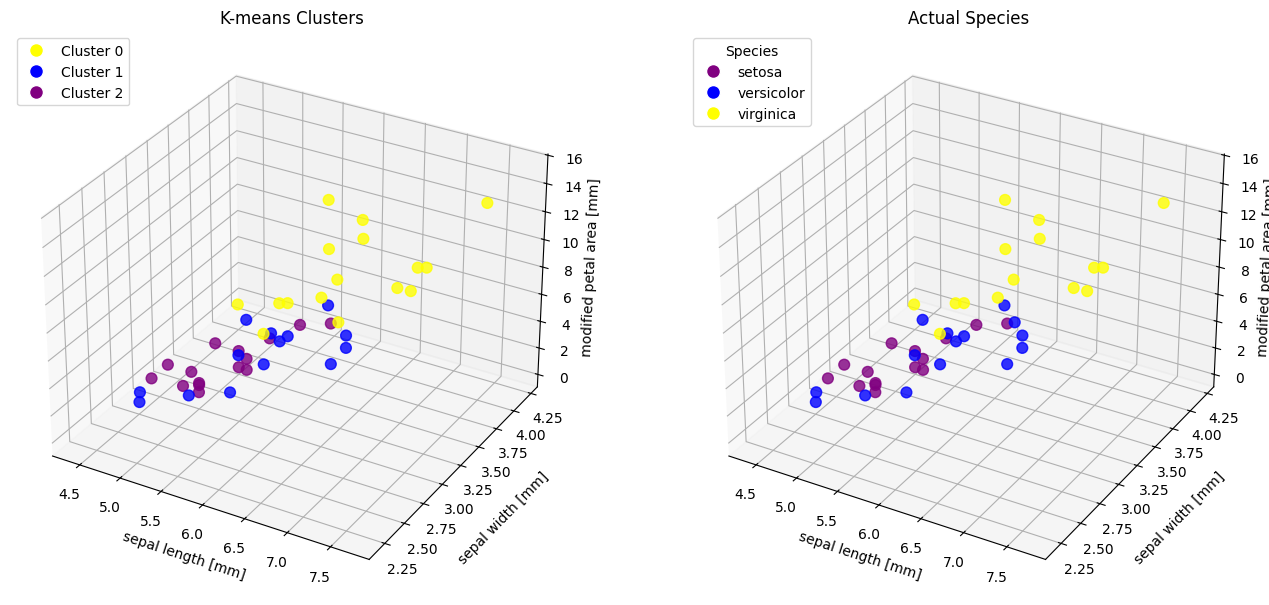

In [61]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd

# --- Data setup (Assuming X_test, kmeans_labels, and df are already defined) ---
df['target'] = data['target']
named_targets = [data.target_names[elm] for elm in df['target'].to_list()]
df['species_name'] = named_targets

# --- Plot setup ---
fig = plt.figure(figsize=(16, 8))  # Adjust figure size as needed
ax1 = fig.add_subplot(121, projection='3d')  # Subplot 1 for k-means clusters
ax2 = fig.add_subplot(122, projection='3d')  # Subplot 2 for actual species

x = X_test[:, 0]
y = X_test[:, 1]
z = X_test[:, 2]

# --- Plot 1: K-means Clusters ---
# Updated color remapping for k-means clusters
kmeans_color_mapping = {0: 'yellow', 1: 'blue', 2: 'purple'}
kmeans_colors = [list(kmeans_color_mapping.keys()).index(label) / 2 for label in kmeans_labels]

scatter1 = ax1.scatter(
    x, y, z,
    c=kmeans_colors,
    s=60,
    cmap=ListedColormap(['yellow', 'purple' ,'blue']),
    alpha=0.8
)

ax1.set_xlabel('sepal length [mm]')
ax1.set_ylabel('sepal width [mm]', labelpad=10)
ax1.set_zlabel('modified petal area [mm]', labelpad=0.5)
ax1.set_title('K-means Clusters')

# Legend for k-means clusters
handles1 = [
    Line2D(
        [0], [0],
        marker='o', color='w',
        label=f'Cluster {label}',
        markerfacecolor=color,
        markersize=10
    )
    for label, color in kmeans_color_mapping.items()
]
ax1.legend(handles=handles1, loc='upper left')

# --- Plot 2: Actual Species ---
# Map species to the new color scheme
species_color_mapping = {
    'setosa': 'purple',
    'versicolor': 'blue',
    'virginica': 'yellow'
}

# Normalize the species names to match the new color scheme
species_normalized_colors = [
    list(species_color_mapping.keys()).index(species) / 2
    for species in df['species_name'][idx_test]
]

# Scatter plot for actual species with updated colors
scatter2 = ax2.scatter(
    x, y, z,
    c=species_normalized_colors,
    s=60, cmap=ListedColormap(['purple', 'blue', 'yellow']),
    alpha=0.8
)

ax2.set_xlabel('sepal length [mm]')
ax2.set_ylabel('sepal width [mm]', labelpad=10)
ax2.set_zlabel('modified petal area [mm]', labelpad=0.5)
ax2.set_title('Actual Species')

# Legend for actual species
handles2 = [
    Line2D(
        [0], [0],
        marker='o', color='w',
        label=species,
        markerfacecolor=color,
        markersize=10
    )
    for species, color in species_color_mapping.items()
]
ax2.legend(handles=handles2, title="Species", loc='upper left')

plt.show()


This took a lot of back and forth with gemini and ChatGPT to coax the graphs together and get the legends properly working and alignedl This was for ease of gauging accuracy of unsupervised learned when compared to the actual target values.

#Finally, we will use sklearn and compare!

In [66]:
from sklearn.cluster import KMeans
skmodel = KMeans(
    n_clusters=3,
    init='k-means++',
    n_init='auto',
    max_iter=300,
    tol=0.0001,
    verbose=0,
    random_state=None,
    copy_x=True,
    algorithm='lloyd',
)

skmodel.fit(X_train)

df['skmodel_labels'] = skmodel.predict(X)

skmodel.labels_


array([0, 1, 0, 2, 1, 2, 1, 2, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 2, 1,
       2, 0, 1, 0, 1, 0, 2, 0, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 2, 1, 2, 1, 1, 0, 0, 0, 2, 0, 2, 0, 1, 1, 2, 2, 2,
       1, 2, 1, 0, 0, 2, 2, 1, 1, 1, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 1, 1,
       0, 0, 2, 2, 1, 1, 0, 2, 0, 2, 0, 1, 0, 1, 1, 1, 2], dtype=int32)

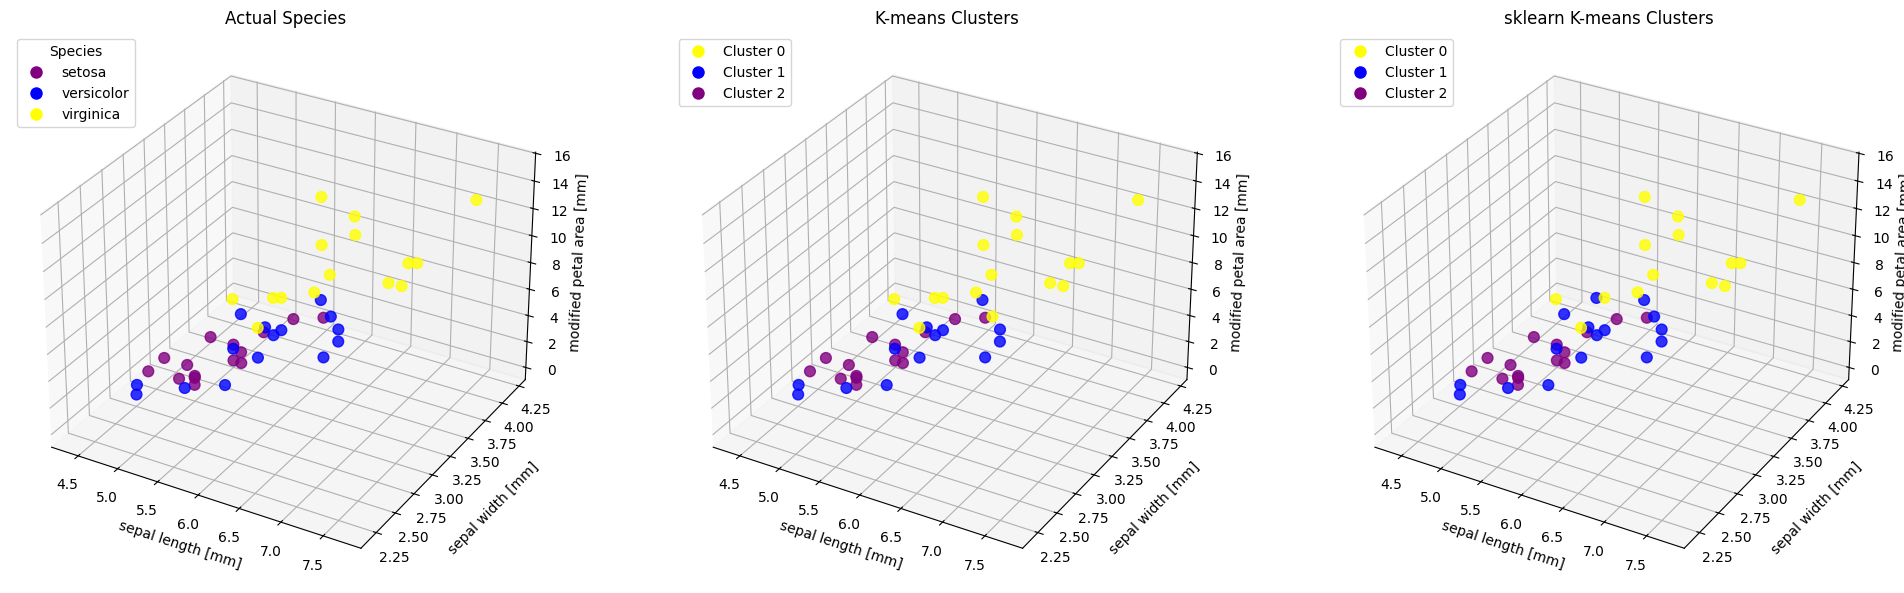

In [70]:
# prompt: Take the code in the previous two blocks, and plot the k-means plot, the sklearn plot, and the actual flowers plot side by side.

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D
from matplotlib.colors import ListedColormap

# Assuming X_test, kmeans_labels, df, skmodel, and idx_test are defined from the previous code

fig = plt.figure(figsize=(20, 6))

# --- Subplot 1: Actual Species ---
ax1 = fig.add_subplot(131, projection='3d')

x = X_test[:, 0]
y = X_test[:, 1]
z = X_test[:, 2]

species_color_mapping = {
    'setosa': 'purple',
    'versicolor': 'blue',
    'virginica': 'yellow'
}

species_normalized_colors = [
    list(species_color_mapping.keys()).index(species) / 2
    for species in df['species_name'][idx_test]
]

scatter1 = ax1.scatter(
    x, y, z,
    c=species_normalized_colors,
    s=60,
    cmap=ListedColormap(['purple', 'blue', 'yellow']),
    alpha=0.8
)
ax1.set_xlabel('sepal length [mm]')
ax1.set_ylabel('sepal width [mm]', labelpad=10)
ax1.set_zlabel('modified petal area [mm]', labelpad=0.5)
ax1.set_title('Actual Species')

handles1 = [
    Line2D([0], [0], marker='o', color='w', label=species, markerfacecolor=color, markersize=10)
    for species, color in species_color_mapping.items()
]
ax1.legend(handles=handles1, title="Species", loc='upper left')


# --- Subplot 2: K-means Clusters ---
ax2 = fig.add_subplot(132, projection='3d')

kmeans_color_mapping = {0: 'yellow', 1: 'blue', 2: 'purple'}
kmeans_colors = [list(kmeans_color_mapping.keys()).index(label) / 2 for label in kmeans_labels]

scatter2 = ax2.scatter(x, y, z, c=kmeans_colors, s=60, cmap=ListedColormap(['yellow', 'purple', 'blue']), alpha=0.8)

ax2.set_xlabel('sepal length [mm]')
ax2.set_ylabel('sepal width [mm]', labelpad=10)
ax2.set_zlabel('modified petal area [mm]', labelpad=0.5)
ax2.set_title('K-means Clusters')

handles2 = [
    Line2D([0], [0], marker='o', color='w', label=f'Cluster {label}', markerfacecolor=color, markersize=10)
    for label, color in kmeans_color_mapping.items()
]
ax2.legend(handles=handles2, loc='upper left')

# --- Subplot 3: scikit-learn K-means Clusters ---
ax3 = fig.add_subplot(133, projection='3d')

sklearn_labels = skmodel.predict(X_test)

sklearn_colors = [list(kmeans_color_mapping.keys()).index(label) / 2 for label in sklearn_labels]

scatter3 = ax3.scatter(
    x, y, z,
    c=sklearn_colors,
    s=60,
    cmap=ListedColormap(['blue', 'purple', 'yellow']),
    alpha=0.8
)
ax3.set_xlabel('sepal length [mm]')
ax3.set_ylabel('sepal width [mm]', labelpad=10)
ax3.set_zlabel('modified petal area [mm]', labelpad=0.5)
ax3.set_title('sklearn K-means Clusters')

handles3 = [
    Line2D([0], [0], marker='o', color='w', label=f'Cluster {label}', markerfacecolor=color, markersize=10)
    for label, color in kmeans_color_mapping.items()
]
ax3.legend(handles=handles3, loc='upper left')


plt.tight_layout()
plt.show()

After much hard work and help from gemini, we can see there is a similar performance from the manually and library k-means methods.

Text(0, 0.5, 'Distortion or Inertia: \nSum of squared distances\n of samples to their closest\n cluster center')

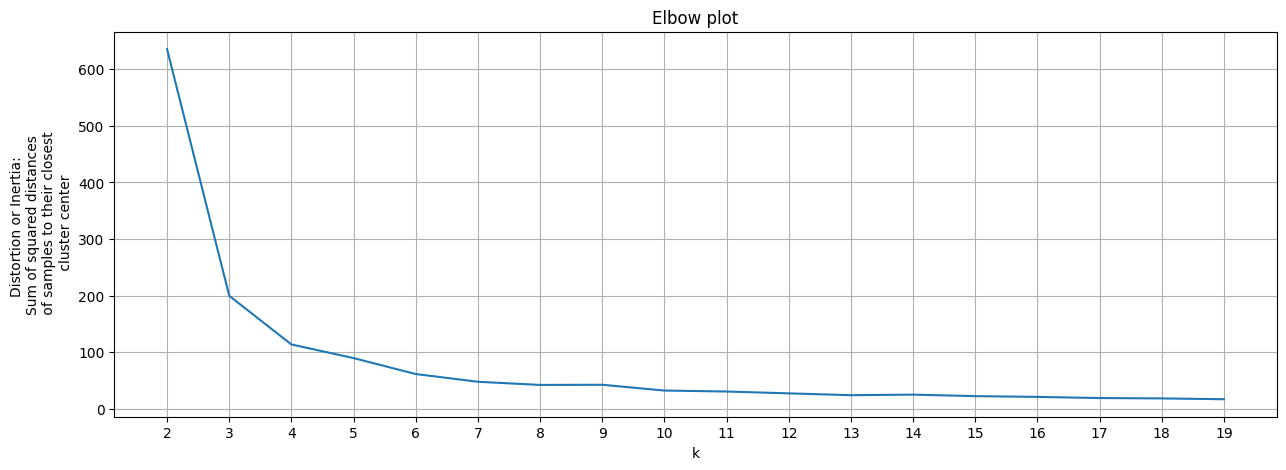

In [71]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt


distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k,init='k-means++',
    n_init='auto',)
    kmeans.fit(X_train)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.xticks(ticks = range(2, 20))
plt.title('Elbow plot')
plt.xlabel('k')
plt.ylabel('Distortion or Inertia: \nSum of squared distances\n of samples to their closest\n cluster center')

From the plot above, we get that as you increase k, we get significant drop offs of distorion of intertia, showing that the k value of 3 is not optimal